### Com o ETL pronto, algumas perguntas surgem e a melhor forma de respondê-las é utilizando gráficos!

In [1]:
# Importando as bibliotecas necessárias e criando o dataframe:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable

data = pd.read_csv("AccidentsPortugues.csv")

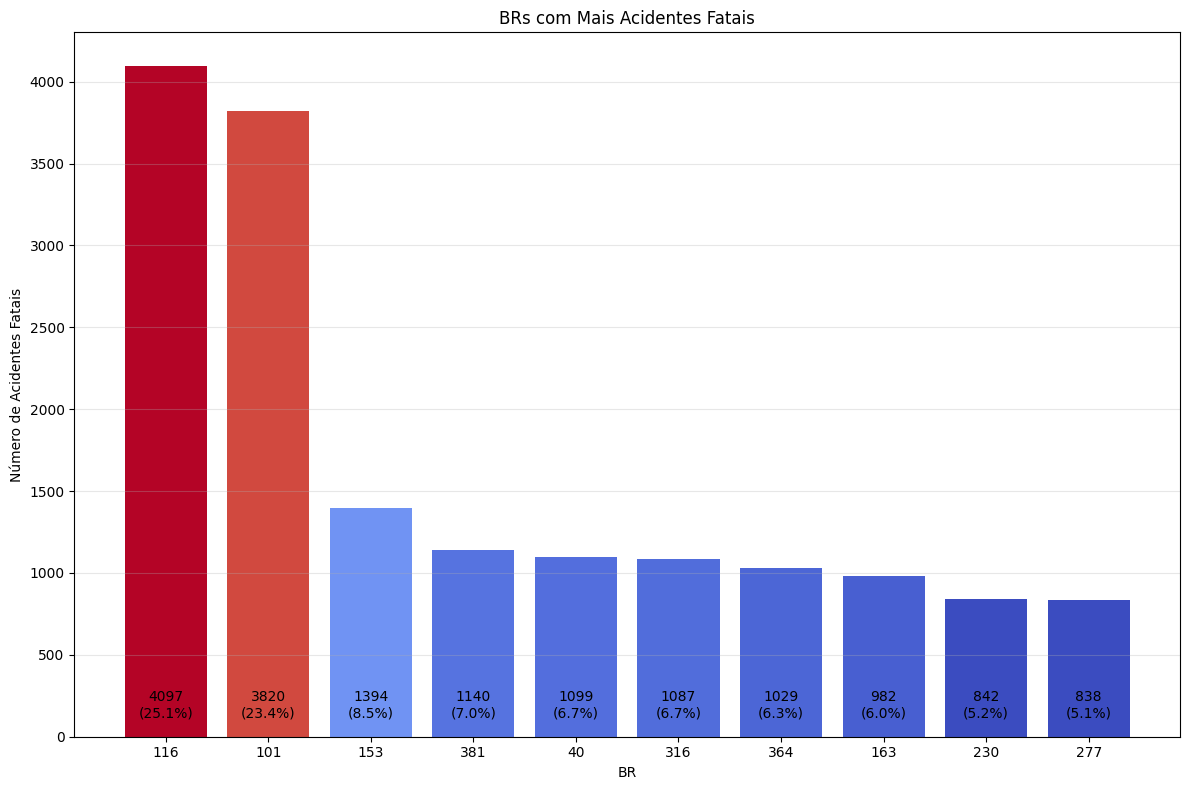

In [2]:
# Qual a BR com mais acidentes fatais?

# Filtrar e contar acidentes fatais
acidentes_fatais = data[data['mortos'] > 0].copy()
acidentes_fatais_br = acidentes_fatais['br'].astype(str).str.split('.').str[0].value_counts().nlargest(10)
# Calcular porcentagens
total_fatais = acidentes_fatais_br.sum()
porcentagens = (acidentes_fatais_br / total_fatais * 100).round(1)
# Plotagem
plt.figure(figsize=(12, 8))
bars = plt.bar(acidentes_fatais_br.index.astype(str), 
               acidentes_fatais_br, 
               color=plt.cm.coolwarm(plt.Normalize()(acidentes_fatais_br)))
for bar, valor, pct in zip(bars, acidentes_fatais_br, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             100,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')
plt.title('BRs com Mais Acidentes Fatais')
plt.xlabel('BR')
plt.ylabel('Número de Acidentes Fatais')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

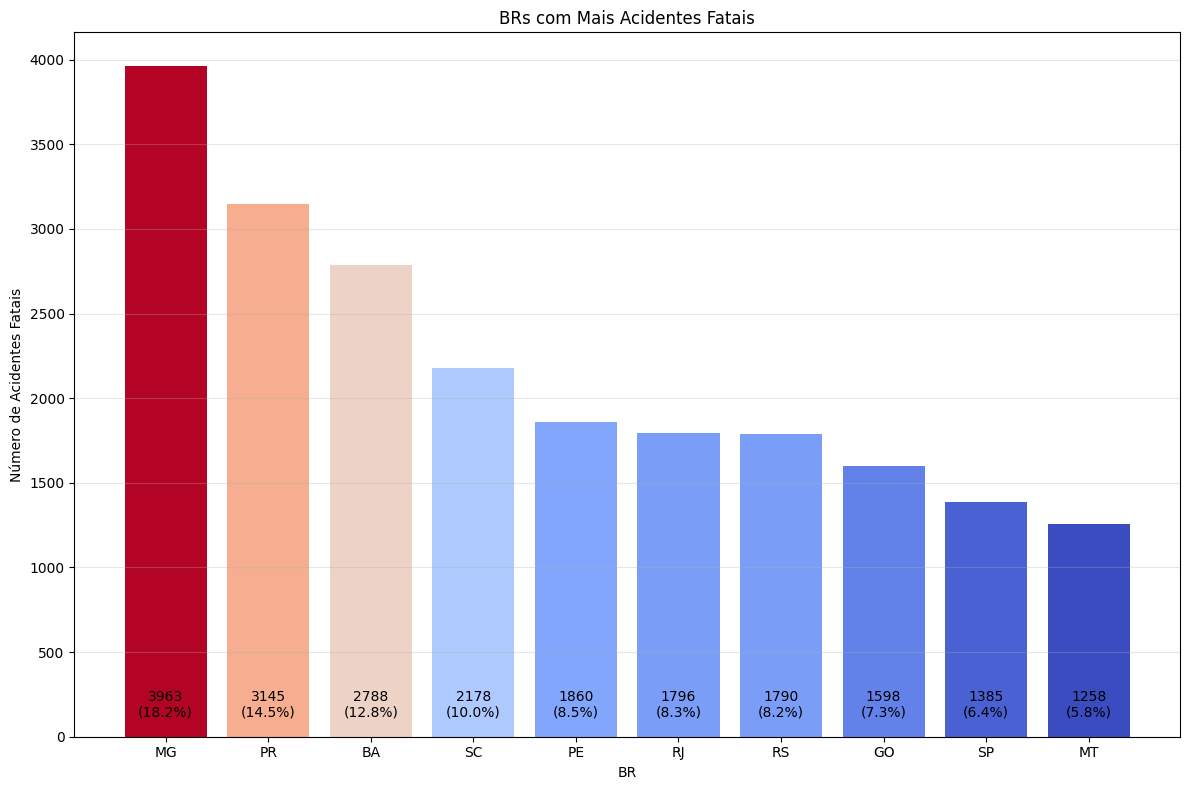

In [3]:
# Qual UF tem mais acidentes fatais?

# Filtrar e contar acidentes fatais
acidentes_fatais_uf = acidentes_fatais["uf"].value_counts().nlargest(10)
# Calcular porcentagens
total_fatais = acidentes_fatais_uf.sum()
porcentagens = (acidentes_fatais_uf / total_fatais * 100).round(1)
# Plotagem
plt.figure(figsize=(12, 8))
bars = plt.bar(acidentes_fatais_uf.index.astype(str), 
               acidentes_fatais_uf, 
               color=plt.cm.coolwarm(plt.Normalize()(acidentes_fatais_uf)))
for bar, valor, pct in zip(bars, acidentes_fatais_uf, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             100,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')
plt.title('BRs com Mais Acidentes Fatais')
plt.xlabel('BR')
plt.ylabel('Número de Acidentes Fatais')
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

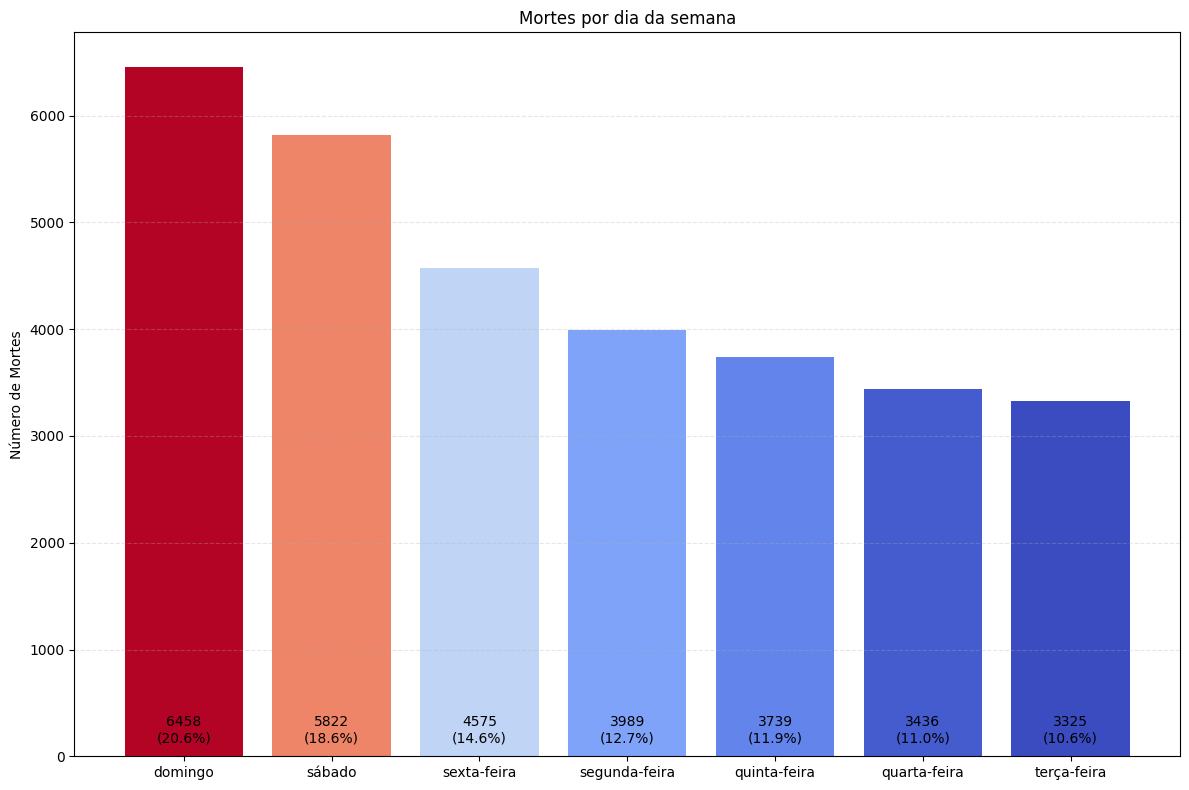

In [4]:
# Qual dia da semana tem mais acidentes fatais?
acidentes_fatais_dia_semana = acidentes_fatais["dia_semana"].value_counts()

# Normalização
norm = plt.Normalize(acidentes_fatais_dia_semana.min(), acidentes_fatais_dia_semana.max())
cores = plt.cm.coolwarm(norm(acidentes_fatais_dia_semana))  # Gradiente azul → vermelho
# Calcular porcentagens
total_fatais = acidentes_fatais_dia_semana.sum()
porcentagens = (acidentes_fatais_dia_semana / total_fatais * 100).round(1)
# Plotagem
plt.figure(figsize=(12, 8))
bars = plt.bar(acidentes_fatais_dia_semana.index.astype(str), 
               acidentes_fatais_dia_semana, 
               color=plt.cm.coolwarm(plt.Normalize()(acidentes_fatais_dia_semana)))
for bar, valor, pct in zip(bars, acidentes_fatais_dia_semana, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             100,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=10,
             color='black')
# Plotagem
plt.title('Mortes por dia da semana')
plt.xlabel('')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

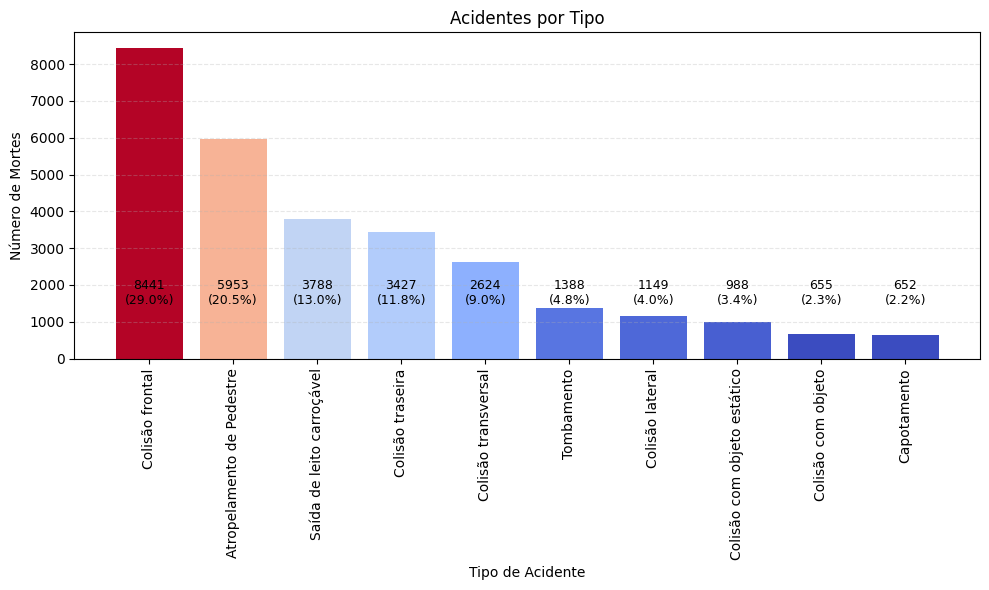

In [5]:
# Qual o tipo de acidente mais mortes?
tipo_acidentes_fatais = acidentes_fatais["tipo_acidente"].value_counts().nlargest(10)

# Cálculo dos percentuais
total = tipo_acidentes_fatais.sum()
porcentagens = (tipo_acidentes_fatais / total * 100).round(1)
# Normalização para as cores
norm = plt.Normalize(tipo_acidentes_fatais.min(), tipo_acidentes_fatais.max())
cores = plt.cm.coolwarm(norm(tipo_acidentes_fatais))
# Plotagem
plt.figure(figsize=(10, 6))
bars = plt.bar(tipo_acidentes_fatais.index.astype(str), tipo_acidentes_fatais, color=cores)
for bar, valor, pct in zip(bars, tipo_acidentes_fatais, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             1400,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=9,
             color='black')
plt.title('Acidentes por Tipo')
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

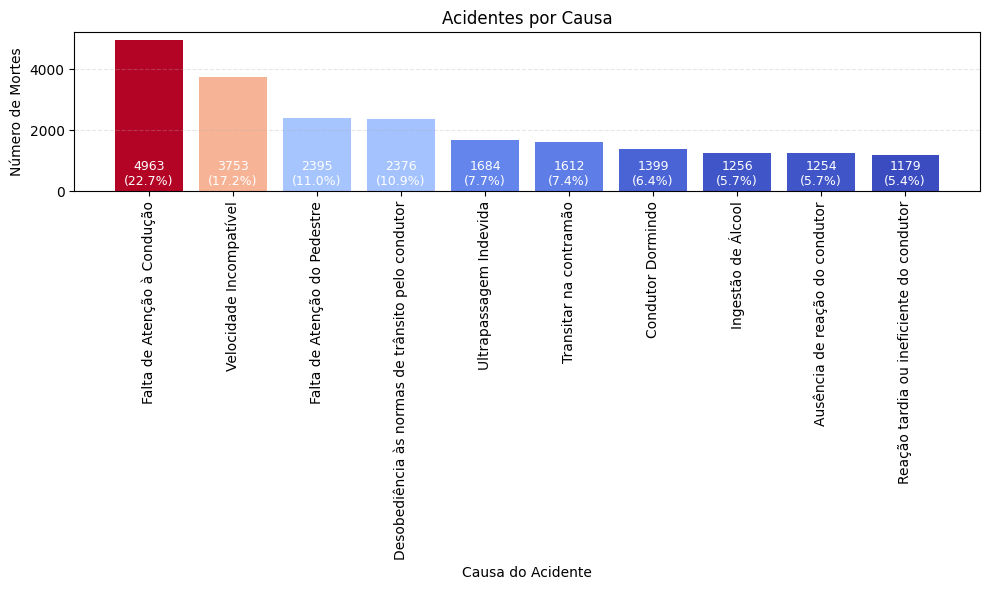

In [6]:
# Qual a causa de acidente mais comum em acidentes fatais?
causa_acidentes_fatais = acidentes_fatais["causa_acidente"].value_counts().nlargest(10)

# Cálculo dos percentuais
total = causa_acidentes_fatais.sum()
porcentagens = (causa_acidentes_fatais / total * 100).round(1)
# Normalização para as cores
norm = plt.Normalize(causa_acidentes_fatais.min(), causa_acidentes_fatais.max())
cores = plt.cm.coolwarm(norm(causa_acidentes_fatais))
# Plotagem
plt.figure(figsize=(10, 6))
bars = plt.bar(causa_acidentes_fatais.index.astype(str), causa_acidentes_fatais, color=cores)
for bar, valor, pct in zip(bars, causa_acidentes_fatais, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             100,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=9,
             color='white')
plt.title('Acidentes por Causa')
plt.xlabel('Causa do Acidente')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

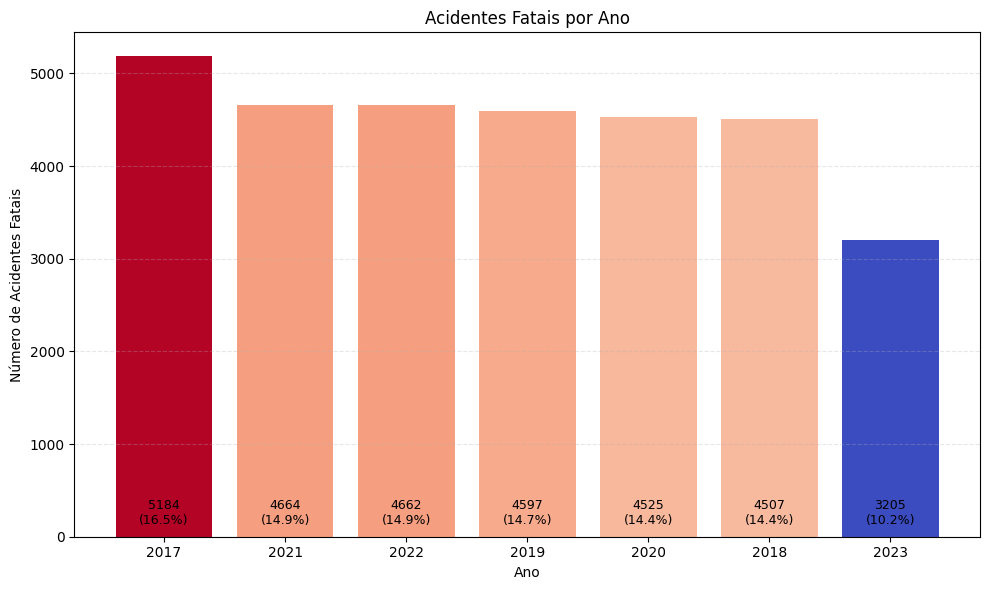

In [7]:
# Total de acidentes por ano?

# 1. Filtrar e converter datas (evitando o Warning)
acidentes_fatais = data.loc[data['mortos'] > 0].copy()  # Usando .copy() para evitar warnings
acidentes_fatais['ano'] = pd.to_datetime(acidentes_fatais['data_inversa']).dt.year
# 2. Contar acidentes fatais por ano
acidentes_fatais_ano = acidentes_fatais['ano'].value_counts().sort_values(ascending=False)
# Cálculo dos percentuais
total = acidentes_fatais_ano.sum()
porcentagens = (acidentes_fatais_ano / total * 100).round(1)
# Normalização para as cores
norm = plt.Normalize(acidentes_fatais_ano.min(), acidentes_fatais_ano.max())
cores = plt.cm.coolwarm(norm(acidentes_fatais_ano))
# Plotagem
plt.figure(figsize=(10, 6))
bars = plt.bar(acidentes_fatais_ano.index.astype(str), acidentes_fatais_ano, color=cores)
for bar, valor, pct in zip(bars, acidentes_fatais_ano, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             100,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=9,
             color='black')
plt.title('Acidentes Fatais por Ano')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes Fatais')
plt.xticks(rotation=0 if len(acidentes_fatais_ano) > 5 else 0)  # Rotaciona se muitos anos
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

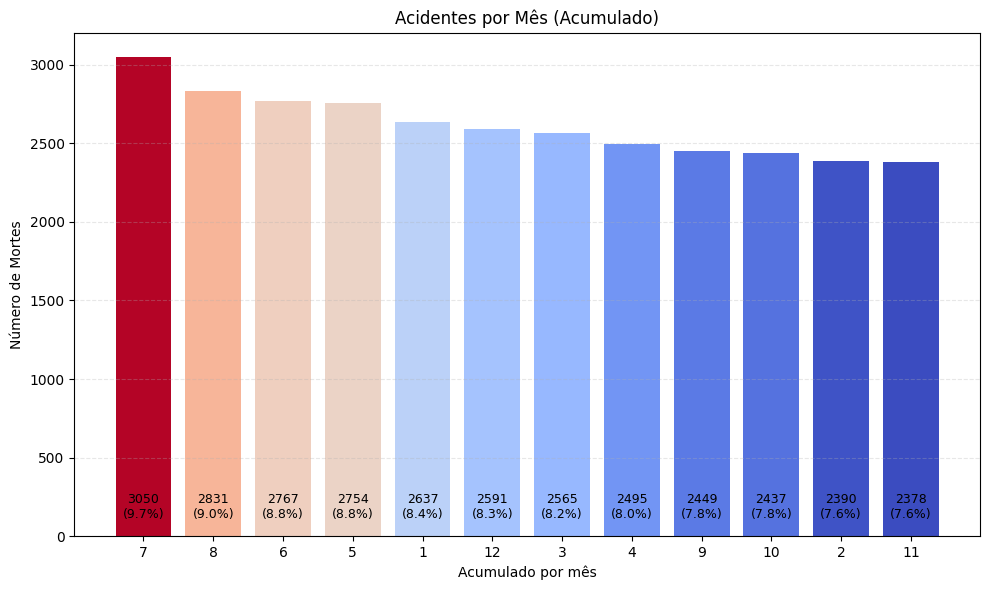

In [8]:
# Total de acidentes fatais por ano?
acidentes_fatais_acumulado_mes = pd.to_datetime(acidentes_fatais['data_inversa']).dt.month.value_counts().sort_values(ascending=False)
# Cálculo dos percentuais
total = acidentes_fatais_acumulado_mes.sum()
porcentagens = (acidentes_fatais_acumulado_mes / total * 100).round(1)
# Normalização para as cores
norm = plt.Normalize(acidentes_fatais_acumulado_mes.min(), acidentes_fatais_acumulado_mes.max())
cores = plt.cm.coolwarm(norm(acidentes_fatais_acumulado_mes))
# Plotagem
plt.figure(figsize=(10, 6))
bars = plt.bar(acidentes_fatais_acumulado_mes.index.astype(str), acidentes_fatais_acumulado_mes, color=cores)
for bar, valor, pct in zip(bars, acidentes_fatais_acumulado_mes, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             100,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=9,
             color='black')
plt.title('Acidentes por Mês (Acumulado)')
plt.xlabel('Acumulado por mês')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

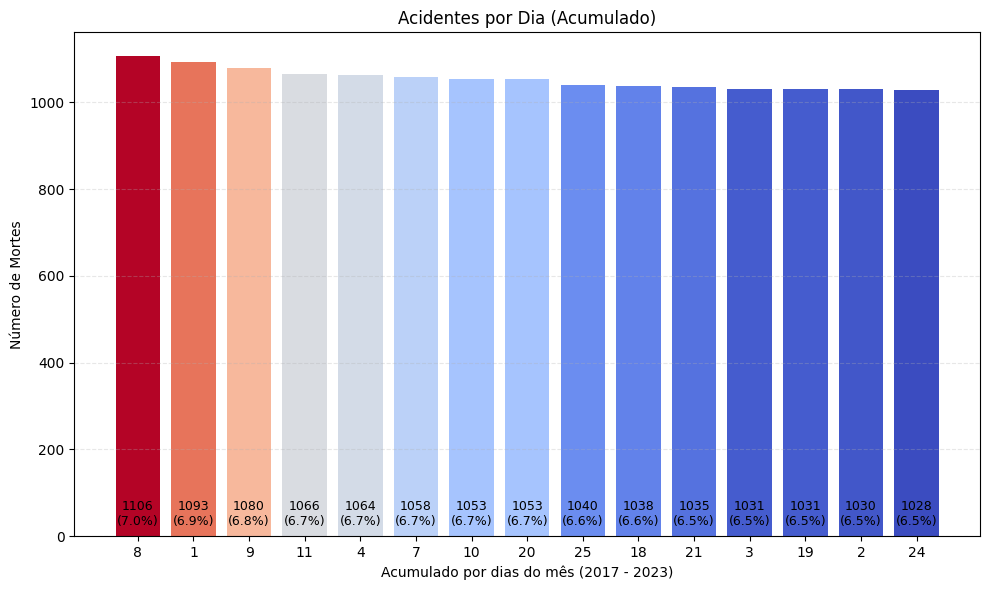

In [9]:
acidentes_fatais_acumulado_dia = pd.to_datetime(acidentes_fatais['data_inversa']).dt.day.value_counts().sort_index().nlargest(15)

# Cálculo dos percentuais
total = acidentes_fatais_acumulado_dia.sum()
porcentagens = (acidentes_fatais_acumulado_dia / total * 100).round(1)
# Normalização para as cores
norm = plt.Normalize(acidentes_fatais_acumulado_dia.min(), acidentes_fatais_acumulado_dia.max())
cores = plt.cm.coolwarm(norm(acidentes_fatais_acumulado_dia))
# Plotagem
plt.figure(figsize=(10, 6))
bars = plt.bar(acidentes_fatais_acumulado_dia.index.astype(str), acidentes_fatais_acumulado_dia, color=cores)
for bar, valor, pct in zip(bars, acidentes_fatais_acumulado_dia, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             20,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=9,
             color='black')
plt.title('Acidentes por Dia (Acumulado)')
plt.xlabel('Acumulado por dias do mês (2017 - 2023)')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

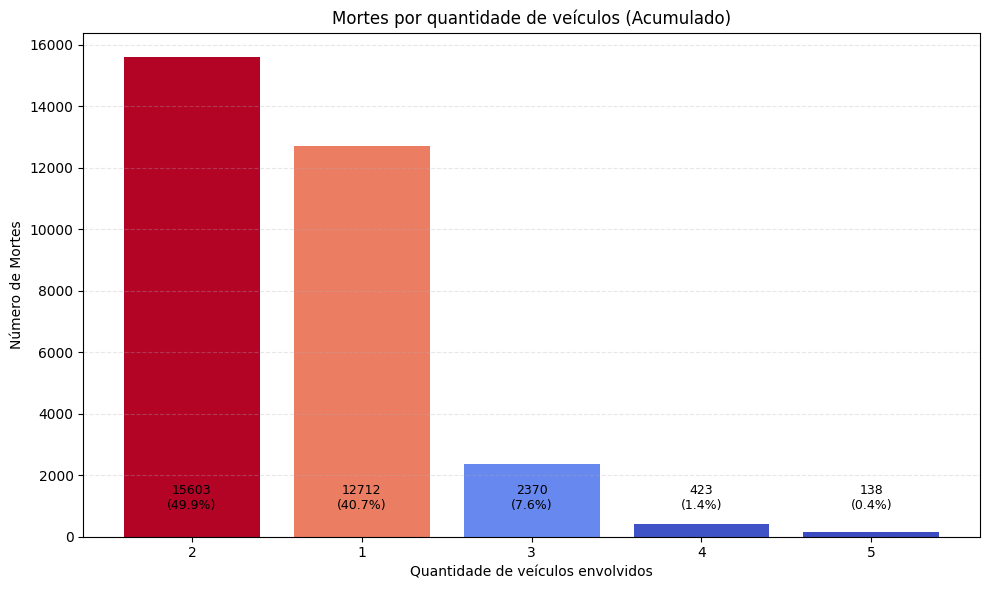

In [10]:
acidentes_fatais_veiculos = acidentes_fatais['veiculos'].value_counts().sort_index().nlargest(5)

# Cálculo dos percentuais
total = acidentes_fatais_veiculos.sum()
porcentagens = (acidentes_fatais_veiculos / total * 100).round(1)
# Normalização para as cores
norm = plt.Normalize(acidentes_fatais_veiculos.min(), acidentes_fatais_veiculos.max())
cores = plt.cm.coolwarm(norm(acidentes_fatais_veiculos))
# Plotagem
plt.figure(figsize=(10, 6))
bars = plt.bar(acidentes_fatais_veiculos.index.astype(str), acidentes_fatais_veiculos, color=cores)
for bar, valor, pct in zip(bars, acidentes_fatais_veiculos, porcentagens):
    plt.text(bar.get_x() + bar.get_width()/2,
             800,
             f'{valor}\n({pct}%)',
             ha='center',
             va='bottom',
             fontsize=9,
             color='black')
plt.title('Mortes por quantidade de veículos (Acumulado)')
plt.xlabel('Quantidade de veículos envolvidos')
plt.ylabel('Número de Mortes')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()